In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [17]:
file=pd.read_csv('loan.csv')
file.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes


In [18]:
file.shape

(10, 4)

In [19]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [20]:
file['Home Owner'],y=pd.factorize(file['Home Owner'])
file['Marital Status'],y=pd.factorize(file['Marital Status'])
file['Defaulted Borrower'],y=pd.factorize(file['Defaulted Borrower'])
file.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,0,0,125,0
1,1,1,100,0
2,1,0,70,0
3,0,1,120,0
4,1,2,95,1


In [21]:
file.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [22]:
x=file[['Home Owner','Marital Status','Annual Income']]
y=file['Defaulted Borrower']
features=list(file.columns[:3])
print(features)

['Home Owner', 'Marital Status', 'Annual Income']


In [23]:
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(x,y)

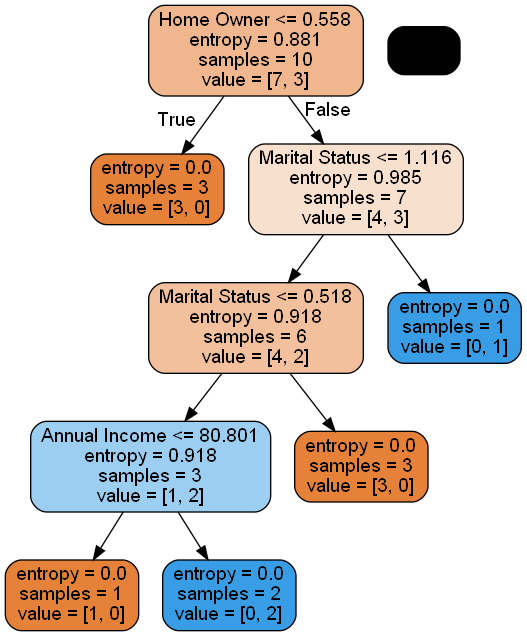

In [24]:
from IPython.display import Image
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import graphviz
import pydotplus

dot_data=six.StringIO()

tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [25]:
from sklearn.tree import export_text

r=export_text(model,feature_names=features)
print(r)

|--- Home Owner <= 0.56
|   |--- class: 0
|--- Home Owner >  0.56
|   |--- Marital Status <= 1.12
|   |   |--- Marital Status <= 0.52
|   |   |   |--- Annual Income <= 80.80
|   |   |   |   |--- class: 0
|   |   |   |--- Annual Income >  80.80
|   |   |   |   |--- class: 1
|   |   |--- Marital Status >  0.52
|   |   |   |--- class: 0
|   |--- Marital Status >  1.12
|   |   |--- class: 1



In [26]:
file.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,0,0,125,0
1,1,1,100,0
2,1,0,70,0
3,0,1,120,0
4,1,2,95,1


In [27]:
model.predict([[0,0,200]])

C:\Users\ASWIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
model.predict([[1,0,200]])

C:\Users\ASWIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [29]:
model.predict([[1,1,200]])

C:\Users\ASWIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)